In [24]:
import numpy as np
import ripser
import matplotlib.pyplot as plt
import random
from persim.persistent_entropy import *
from scipy import stats

D:\anaconda\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
D:\anaconda\Lib\site-packages\persim\wasserstein.py:51: UserWarning: dgm1 has points wit

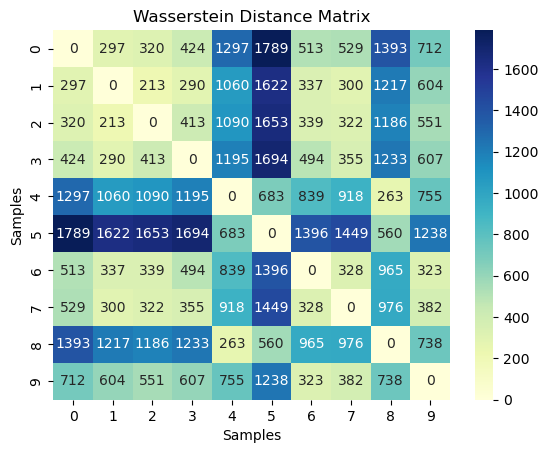

In [19]:
import pandas as pd
import numpy as np
from ripser import ripser
from persim import wasserstein
import os

# Step 1: Load the CSV files
file_paths = [
    "LanB1_280317A.csv",
    "LanB1_280317B.csv",
    "LanB1_300317.csv",
    "Control_130117.csv",
    "Control_140117.csv",
    "Control_191216.csv",
    "Control_201216.csv",
    
    "Scar_140117.csv",
    "Scar_151216.csv",
    "Scar_201216.csv"
]

# Step 2: Extract the point clouds at Time = 400
point_clouds = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    # Filter rows where Time = 400 and select relevant coordinates
    points_at_400 = df[df["Time"] == 100][['Position X', 'Position Y', 'Position Z']].values  # Adjust column names if needed
    point_clouds.append(points_at_400)

# Step 3: Compute persistence diagrams
diagrams_list = [ripser(pc)['dgms'] for pc in point_clouds]

# Step 4: Compute the Wasserstein distance matrix
n_samples = len(diagrams_list)
wasserstein_matrix = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(i, n_samples):
        # Compute Wasserstein distance for H0
        distance = wasserstein(diagrams_list[i][0], diagrams_list[j][0])
        wasserstein_matrix[i, j] = distance
        wasserstein_matrix[j, i] = distance  # Symmetric matrix

# Step 5: Display the Wasserstein matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(wasserstein_matrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Wasserstein Distance Matrix")
plt.xlabel("Samples")
plt.ylabel("Samples")
plt.show()

In [20]:
e1 = persistent_entropy(diagrams_list[1])
print(e1)

[6.30246163 4.67925431]


In [20]:
entropy = np.zeros((10, 2))
for i in range(10):
    entropy[i] = persistent_entropy(diagrams_list[i])
print(entropy[1])


[6.30246163 4.67925431]


In [18]:

stats.mannwhitneyu(entropy[5], entropy[0])

MannwhitneyuResult(statistic=1.0, pvalue=0.6666666666666666)

[array([], shape=(0, 3), dtype=float64), array([[106.764 ,  59.242 ,   0.5   ],
       [139.068 ,  83.228 ,   0.5   ],
       [145.974 ,  97.8202,   0.5   ],
       ...,
       [ 51.123 , 280.97  ,  70.5   ],
       [ 61.9898, 282.696 ,  70.5   ],
       [118.834 , 420.242 ,  70.5   ]]), array([[106.631  ,  59.195  ,   0.5    ],
       [ 73.2978 ,  68.3041 ,   0.5    ],
       [139.085  ,  83.1503 ,   0.5    ],
       ...,
       [ 51.5906 , 367.387  ,  64.8559 ],
       [119.271  , 419.907  ,  70.5    ],
       [ 45.1441 , 149.431  ,   8.17976]]), array([[106.569  ,  59.3027 ,   0.5    ],
       [ 73.4178 ,  68.0446 ,   0.5    ],
       [139.22   ,  83.1731 ,   0.5    ],
       ...,
       [119.299  , 420.112  ,  70.5    ],
       [ 45.1498 , 150.157  ,   7.31653],
       [ 71.992  , 313.686  ,  57.153  ]]), array([[106.689 ,  58.9942,   0.5   ],
       [ 73.4936,  67.7996,   0.5   ],
       [139.564 ,  83.0419,   0.5   ],
       ...,
       [ 63.5524, 285.722 ,  70.5   ],
       [ 49

In [54]:
import pandas as pd
import numpy as np
from ripser import ripser
from tqdm import tqdm  # For progress bar

# Step 1: Load the CSV files
file_paths = [
    "LanB1_280317A.csv",
    "LanB1_280317B.csv",
    "LanB1_300317.csv",
    "Control_130117.csv",
    "Control_140117.csv",
    "Control_191216.csv",
    "Control_201216.csv",
    "Scar_140117.csv",
    "Scar_151216.csv",
    "Scar_201216.csv"
]

# Number of timesteps to sample and total timesteps in the dataset
start_tiemesteps = 1
n_timesteps = 40
max_timestep = 400

# Step 2: Compute diagrams for all samples across the selected timesteps
selected_timesteps = np.linspace(start_tiemesteps, max_timestep, n_timesteps, dtype=int)
diagrams_dict = {}

for file_path in tqdm(file_paths, desc="Processing Samples"):
    # Load the data
    df = pd.read_csv(file_path)
    
    # Initialize a list of length 40
    diagrams = [None] * n_timesteps

    # Compute diagrams for the selected timesteps
    for idx, t in enumerate(selected_timesteps):
        points_at_t = df[df["Time"] == t][['Position X', 'Position Y', 'Position Z']].values
        diagram = ripser(points_at_t)['dgms'][1] if len(points_at_t) > 0 else []
        diagrams[idx] = diagram
    
    # Store diagrams for this sample
    diagrams_dict[file_path] = diagrams

# Step 3: Output or further process the diagrams
# Example: Access diagrams for the first sample and first timestep
sample_path = file_paths[0]
timestep_index = 0
print(f"Diagrams for {sample_path} at timestep {selected_timesteps[timestep_index]}:")
print(diagrams_dict[sample_path][timestep_index])

# Check the length of the array for the first sample
print(f"Length of diagrams array for {sample_path}: {len(diagrams_dict[sample_path])}")


Processing Samples: 100%|██████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.17s/it]

Diagrams for LanB1_280317A.csv at timestep 1:
[[67.21424866 67.73339081]
 [49.72414017 51.26870728]
 [40.93664932 44.22956848]
 [39.33657074 41.61293793]
 [34.50364304 37.60296631]
 [33.57833099 34.14336395]
 [33.38093948 63.51314545]
 [32.80308914 35.5243454 ]
 [32.46264267 39.15398407]
 [31.71473503 37.30519104]
 [31.65777016 40.13442993]
 [31.16060448 32.58646393]
 [30.52274132 30.66113281]
 [30.4467392  30.82762718]
 [30.179842   30.21852493]
 [30.14908218 73.81974792]
 [30.05864906 39.64514923]
 [29.83232307 35.55500412]
 [29.71436691 34.1499939 ]
 [29.17793846 32.94494629]
 [28.83502579 28.96809959]
 [28.2659626  28.41954994]
 [27.98020172 31.49274063]
 [27.49787331 33.02869034]
 [27.40047455 50.60035324]
 [27.28643036 32.99951172]
 [26.99413681 27.90125084]
 [26.52631569 26.69557953]
 [26.2667408  27.78435516]
 [25.90636635 38.22834396]
 [25.8120079  28.31717682]
 [25.13406944 29.48162079]
 [24.9819355  25.15495682]
 [24.91440773 25.36229897]
 [24.90577888 26.25601768]
 [24.7329

In [10]:
print(type(diagrams_dict[file_paths[0]]))

<class 'list'>


In [55]:
barcode_0 = diagrams_dict[file_paths[2]]
e0 = persistent_entropy(barcode_0)
print(e0)

[4.09554595 4.44976194 4.4986489  4.49989138 4.48984151 4.58076698
 4.70355588 4.66084402 4.55699006 4.64841577 4.77841379 4.85037464
 4.90507591 4.93581348 4.94487364 4.85660822 4.90374644 4.8322054
 4.86563075 4.92050604 4.8941126  5.02408201 5.04853719 5.09160309
 4.98931635 5.06360792 5.06330195 5.11077377 5.13566869 5.0827751
 5.03803425 5.09065096 5.07887292 5.1060345  5.12204548 5.19555765
 5.15030288 5.19127638 5.10284137 4.89703937]


In [56]:
barcode_6 = diagrams_dict[file_paths[6]]
e6 = persistent_entropy(barcode_6)
print(e6)

[4.22639467 4.43995727 4.60533401 4.54544449 4.61312742 4.55185804
 4.58182903 4.55178728 4.59218236 4.49921573 4.59618207 4.58472701
 4.55755581 4.60085686 4.57160665 4.56907733 4.54417706 4.49919432
 4.58067258 4.55567336 4.58730953 4.65110554 4.72343238 4.7431905
 4.76191415 4.79152142 4.90517745 4.83152598 4.78143493 4.98390553
 4.96768556 5.01924971 5.00114949 4.92321788 5.00153012 5.02725889
 5.08174132 4.97468589 4.98663228 4.93954798]


In [57]:

stats.mannwhitneyu(persistent_entropy(diagrams_dict[file_paths[1]]), persistent_entropy(diagrams_dict[file_paths[9]]))

MannwhitneyuResult(statistic=771.0, pvalue=0.7838991316191836)

In [58]:
entropy_array = np.zeros((10, 40))
for i in range(10):
    entropy_array[i] = persistent_entropy(diagrams_dict[file_paths[i]])
print(entropy_array)

[[4.05829663 4.35801704 4.62031699 4.69515418 4.6118548  4.61420272
  4.70936624 4.68920736 4.74550044 4.74935487 4.79938362 4.74739858
  4.87864913 4.81237866 4.92856452 4.90806185 4.87063988 4.94463239
  5.00181821 4.94724354 4.86862402 4.96159663 5.03997753 5.06884545
  5.0370401  5.09565755 5.06682688 5.01761971 5.05231139 5.03785844
  5.06713941 5.1586468  5.17185235 5.20460553 5.21031824 5.21947971
  5.23610817 5.30532983 5.18705897 4.96941138]
 [4.24608933 4.5111525  4.68283065 4.59198637 4.61547731 4.65653313
  4.63253246 4.61467221 4.69778373 4.66701936 4.68931983 4.80107882
  4.77448345 4.68821224 4.77937773 4.78732948 4.76585761 4.84071121
  4.7378535  4.85247565 4.86995113 4.96410195 4.93536643 4.98845921
  4.89662844 4.86594794 4.95466202 4.96190762 4.97012975 5.05069984
  5.09728473 5.09195045 5.13423335 5.15548495 5.21151357 5.26084708
  5.27079578 5.26446393 5.20931061 5.00732323]
 [4.09554595 4.44976194 4.4986489  4.49989138 4.48984151 4.58076698
  4.70355588 4.6608440

In [59]:
import numpy as np
import scipy.stats as stats
import pandas as pd


# Generate sample entropy_array (replace with actual data)
np.random.seed(42)  # For reproducibility


# Initialize a 10x10 matrix to store p-values
p_value_matrix = np.zeros((10, 10))

# Perform Mann-Whitney U test for each pair of samples
for i in range(10):
    for j in range(10):
        if i != j:
            _, p_value = stats.mannwhitneyu(entropy_array[i], entropy_array[j], alternative='two-sided')
            p_value_matrix[i, j] = p_value
        else:
            p_value_matrix[i, j] = np.nan  # NaN for self-comparison
print(p_value_matrix)

            
            
            

[[           nan 2.30916313e-01 6.47621478e-01 2.56555598e-07
  6.34656129e-13 4.07815246e-14 3.58268123e-05 6.35332697e-09
  2.22477213e-12 4.38569194e-01]
 [2.30916313e-01            nan 5.53995221e-01 1.81244351e-05
  1.41520379e-13 1.43508531e-14 1.37674430e-03 5.21752131e-07
  2.51853932e-13 7.83899132e-01]
 [6.47621478e-01 5.53995221e-01            nan 1.97604262e-05
  3.60014426e-13 2.42460159e-14 9.48645347e-04 3.27965094e-06
  1.19264630e-12 8.36100572e-01]
 [2.56555598e-07 1.81244351e-05 1.97604262e-05            nan
  1.43508531e-14 1.43508531e-14 6.54552738e-01 2.42349528e-01
  1.43508531e-14 9.54305042e-05]
 [6.34656129e-13 1.41520379e-13 3.60014426e-13 1.43508531e-14
             nan 2.34420671e-13 2.18174273e-13 1.79774390e-14
  1.71559041e-04 6.82884785e-14]
 [4.07815246e-14 1.43508531e-14 2.42460159e-14 1.43508531e-14
  2.34420671e-13            nan 1.43508531e-14 1.43508531e-14
  2.42460159e-14 1.43508531e-14]
 [3.58268123e-05 1.37674430e-03 9.48645347e-04 6.54552738e

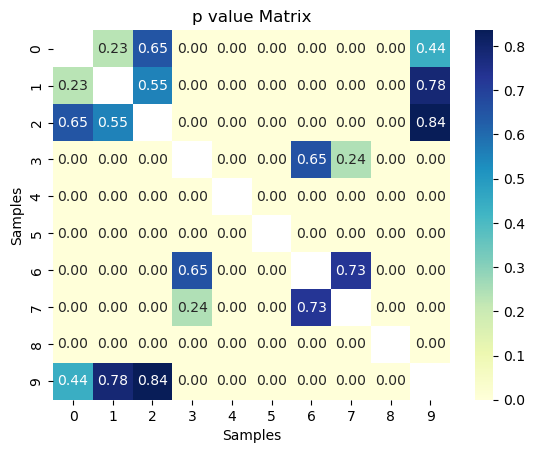

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(p_value_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("p value Matrix")
plt.xlabel("Samples")
plt.ylabel("Samples")
plt.show()

In [30]:
# Normal point clouds
mu = 0.5
sigma = 0.25
l1 = []
for i in range(40):
    d1 = np.random.normal(mu, sigma, (750,2))
    l1.append(d1)
# Uniform point clouds
l2 = []
for i in range(40):
    d2 = np.random.random((240,2))
    l2.append(d2)

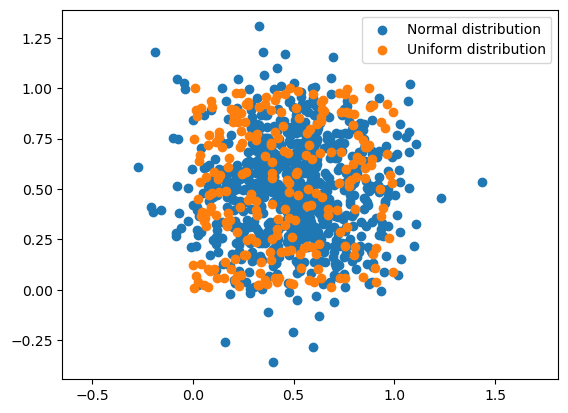

In [31]:
# Example of normal and uniform point clouds
plt.scatter(d1[:,0], d1[:,1], label="Normal distribution")
plt.scatter(d2[:,0], d2[:,1], label="Uniform distribution")
plt.axis('equal')
plt.legend()
plt.show()

In [39]:
# Generate the persistent diagrams using ripser
p = 0
dgm_d1 = []
dgm_d2 = []
for i in range(len(l1)):
    dgm_d1.append(ripser.ripser(l1[i])['dgms'][p])
    dgm_d2.append(ripser.ripser(l2[i])['dgms'][p])
# Calculate their persistent entropy.
e1 = persistent_entropy(dgm_d1)
e2 = persistent_entropy(dgm_d2)

In [41]:
print(e2)

[5.35696342 5.3514804  5.348688   5.35418284 5.35141243 5.35240008
 5.36022348 5.36232225 5.36979526 5.34224504 5.36877732 5.35860185
 5.35695276 5.34189358 5.36548522 5.34182371 5.32741204 5.34922893
 5.37345528 5.37359557 5.35198407 5.3259757  5.35738231 5.35143454
 5.35219291 5.34651866 5.3674298  5.34989441 5.36160061 5.35523978
 5.34799723 5.35041672 5.35674607 5.3706891  5.3525152  5.36147808
 5.34303918 5.37174096 5.36826315 5.3598387 ]


In [46]:
stats.
(e1[30:],e2[30:])

MannwhitneyuResult(statistic=100.0, pvalue=0.00018267179110955002)